In [ ]:
!pip install roboflow opencv-python-headless numpy inference

In [ ]:
import cv2
import numpy as np
from roboflow import Roboflow

In [ ]:
# Initialize Roboflow with your API key
rf = Roboflow(api_key="d8gHWqpnohHIJPxcZcTm")

# Load the project and model version
project = rf.workspace().project("bone-cancer-segmentation-xukmn")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BONE-CANCER-SEGMENTATION-1 in yolov8:: 100%|██████████| 3874/3874 [00:00<00:00, 4764.12it/s]


In [ ]:
!rm -rf /kaggle/working/*

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!mkdir -p /kaggle/working/yolov10/weights
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install supervision
!pip install ultralytics
import supervision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
class CFG:
    EPOCHS = 20
    BATCH_SIZE = 8
    SEED = 6
    LEARNING_RATE = 0.001
    NUM_SAMPLES = 16
    OPTIMIZER = 'Adam'

    DATA_PATH = '/content/BONE-CANCER-SEGMENTATION-1/data.yaml'
    SAMPLE_PATH = '/content/BONE-CANCER-SEGMENTATION-1/train/images/*'

/content/BONE-CANCER-SEGMENTATION-1/train/images/*


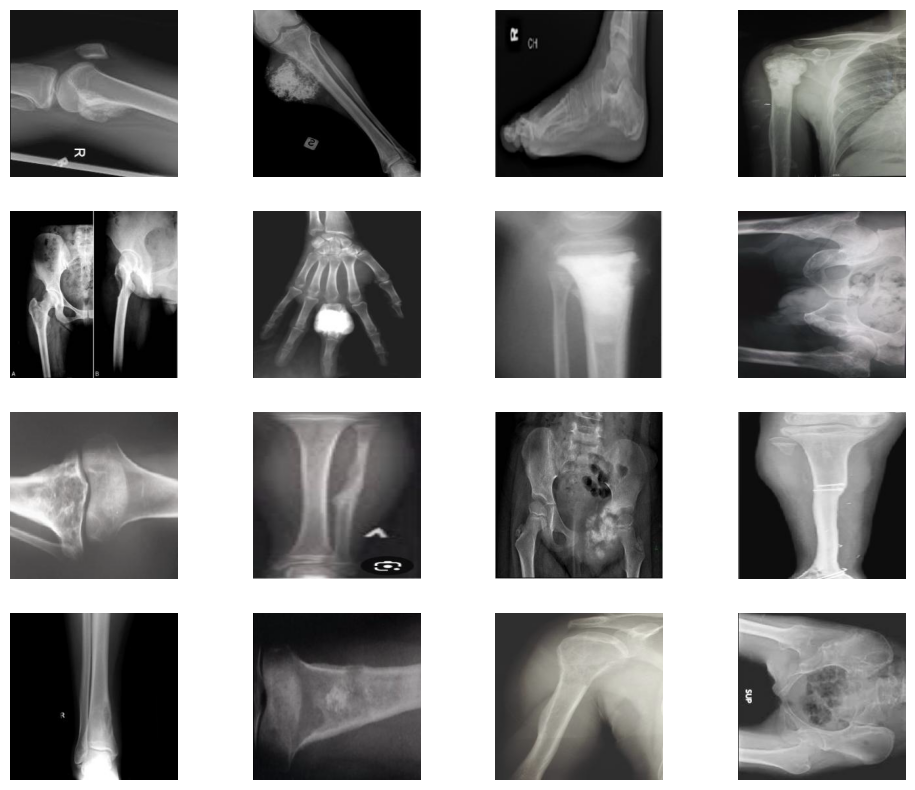

In [ ]:
import random
from glob import glob

# Make sure the path is correct and leads to image files
print(CFG.SAMPLE_PATH)
images_data = glob(CFG.SAMPLE_PATH)

# Check if any images were found
if not images_data:
    print("No images found. Check your CFG.SAMPLE_PATH.")
else:
    # Ensure you're not trying to sample more images than you have
    num_samples = min(CFG.NUM_SAMPLES, len(images_data))
    random_image = random.sample(images_data, num_samples)

    # ... rest of the code

    plt.figure(figsize=(12,10))
    for i in range(num_samples):
        plt.subplot(4,4,i+1)
        plt.imshow(cv2.imread(random_image[i]))
        plt.axis('off')

In [ ]:
# Install yolov10
!pip install -q git+https://github.com/THU-MIG/yolov10.git

# Create a directory for the weights
!mkdir -p /kaggle/working/yolov10/weights

# Download the yolov10m.pt weight file
!wget -P /kaggle/working/yolov10/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt

# Import necessary libraries
import supervision as sv
import ultralytics
from ultralytics import YOLO, YOLOv10

# Load the YOLO models, specifying the correct path to the weight files
yolo_v10_model = YOLO('/kaggle/working/yolov10/weights/yolov10m.pt')  # Use the full path to yolov10m.pt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Import necessary libraries
import supervision as sv
from ultralytics import YOLO
# Now you can train the model
v10_model = yolo_v10_model.train(data=CFG.DATA_PATH,seed=CFG.SEED,epochs=CFG.EPOCHS, lr0=CFG.LEARNING_RATE, optimizer=CFG.OPTIMIZER, verbose=True,
  project='ft_models',
  name='yolo_v10')

New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov10/weights/yolov10m.pt, data=/content/BONE-CANCER-SEGMENTATION-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=ft_models, name=yolo_v10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=6, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

100%|██████████| 755k/755k [00:00<00:00, 20.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 102MB/s]


AMP: checks passed ✅


train: Scanning /content/BONE-CANCER-SEGMENTATION-1/train/labels... 1789 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1789/1789 [00:01<00:00, 1480.42it/s]


train: New cache created: /content/BONE-CANCER-SEGMENTATION-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/BONE-CANCER-SEGMENTATION-1/valid/labels... 72 images, 1 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 592.26it/s]

val: New cache created: /content/BONE-CANCER-SEGMENTATION-1/valid/labels.cache


Plotting labels to ft_models/yolo_v10/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to ft_models/yolo_v10
Starting training for 20 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/20      9.18G      1.889      2.828      2.135      1.838      3.471      2.017         45        640: 100%|██████████| 112/112 [01:15<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all         72         76      0.165     0.0658      0.047     0.0162



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/20      9.31G      1.967      2.739      2.199      1.933      3.091       2.08         25        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         72         76      0.217     0.0921     0.0942     0.0259



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/20      9.31G      1.891      2.697      2.144      1.899      3.028      2.073         29        640: 100%|██████████| 112/112 [01:12<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         72         76      0.138      0.171     0.0701     0.0227



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/20      9.31G      1.875      2.629      2.101      1.859      2.996      2.021         26        640: 100%|██████████| 112/112 [01:13<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all         72         76       0.11      0.197     0.0656     0.0208



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/20      9.31G      1.863      2.604      2.082      1.845      2.935      2.003         27        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all         72         76       0.18      0.224      0.118     0.0403



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/20      9.31G      1.818      2.502      2.034      1.776      2.846      1.956         24        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all         72         76      0.222      0.263      0.188     0.0649



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/20      9.31G      1.739      2.436      1.988      1.735      2.748      1.928         35        640: 100%|██████████| 112/112 [01:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all         72         76      0.224      0.211      0.153      0.068



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/20      9.31G      1.724      2.365      1.972      1.706      2.656      1.873         29        640: 100%|██████████| 112/112 [01:13<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.28it/s]

                   all         72         76       0.35      0.316      0.247     0.0903



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/20      9.31G      1.723      2.358      1.976       1.69      2.641      1.876         29        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         72         76      0.234      0.395      0.197     0.0732



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/20      9.31G      1.683      2.291      1.934      1.713       2.54      1.877         25        640: 100%|██████████| 112/112 [01:12<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all         72         76      0.442      0.329       0.29      0.116


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/20      9.31G      1.773      2.342      2.115      1.817      2.497      2.092         21        640: 100%|██████████| 112/112 [01:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         72         76       0.26      0.316       0.24     0.0926



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/20      9.31G      1.733      2.236      2.082      1.758      2.395      2.058         17        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         72         76      0.406      0.434       0.35      0.149



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/20      9.32G      1.665      2.136      2.012      1.696      2.259      1.988         13        640: 100%|██████████| 112/112 [01:11<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         72         76       0.33      0.368      0.328      0.132



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/20      9.32G      1.653        2.1      2.028      1.649      2.264      1.974         13        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         72         76      0.383      0.342      0.378      0.165



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/20      9.32G      1.595      1.986      1.984      1.631      2.123      1.967         14        640: 100%|██████████| 112/112 [01:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         72         76       0.45      0.527      0.445      0.177



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/20      9.32G      1.571      1.953      1.975       1.61      2.089      1.958         13        640: 100%|██████████| 112/112 [01:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         72         76      0.535       0.56       0.55      0.238



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/20      9.32G      1.532      1.856      1.911      1.585      1.957      1.906         14        640: 100%|██████████| 112/112 [01:11<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         72         76       0.62      0.487      0.512      0.208



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/20      9.32G      1.526      1.784      1.897      1.579      1.881        1.9         13        640: 100%|██████████| 112/112 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.41it/s]

                   all         72         76      0.588      0.474      0.537      0.219



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/20      9.32G       1.49      1.751      1.876      1.525      1.858      1.858         16        640: 100%|██████████| 112/112 [01:11<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all         72         76      0.528      0.474      0.493      0.202



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/20      9.32G      1.448       1.66      1.818      1.494      1.791      1.815         14        640: 100%|██████████| 112/112 [01:12<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]

                   all         72         76      0.558      0.566      0.576       0.24



20 epochs completed in 0.438 hours.
Optimizer stripped from ft_models/yolo_v10/weights/last.pt, 33.5MB
Optimizer stripped from ft_models/yolo_v10/weights/best.pt, 33.5MB

Validating ft_models/yolo_v10/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16451542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]


                   all         72         76      0.548      0.566      0.577      0.242
Speed: 0.6ms preprocess, 24.1ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to ft_models/yolo_v10


In [ ]:
model = YOLO("/content/best.pt")
results = model.val(data="/content/BONE-CANCER-SEGMENTATION-1/data.yaml")
print(f"Precision: {results.box.maps[0]:.4f}")
print(f"Recall: {results.box.maps[1]:.4f}")
print(f"mAP50: {results.box.map:.4f}")
print(f"mAP50-95: {results.box.map95:.4f}")

In [ ]:
# import shutil

# # Specify the folder path
# folder_path = '/content/runs'

# # Delete the folder and its contents
# shutil.rmtree(folder_path)

# print(f"{folder_path} has been deleted.")


/content/runs has been deleted.



image 1/1 /content/BONE-CANCER-SEGMENTATION-1/train/images/C01_png.rf.923823aa8aef002ff05b67f561dbe45a.jpg: 640x640 1 cancer, 2442.4ms
Speed: 21.3ms preprocess, 2442.4ms inference, 27.6ms postprocess per image at shape (1, 3, 640, 640)


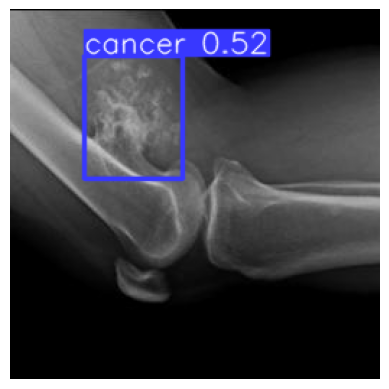

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLOv10

# Load the best trained model
best_v10_model = YOLOv10("/content/best.pt")

# Inference on a sample image
results = best_v10_model("/content/BONE-CANCER-SEGMENTATION-1/train/images/C01_png.rf.923823aa8aef002ff05b67f561dbe45a.jpg")

# Display the image using Matplotlib with bounding boxes
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()

In [ ]:
from IPython.display import Image
Image(filename='/content/ft_models/yolo_v10/confusion_matrix.png', width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/ft_models/yolo_v10/confusion_matrix.png'

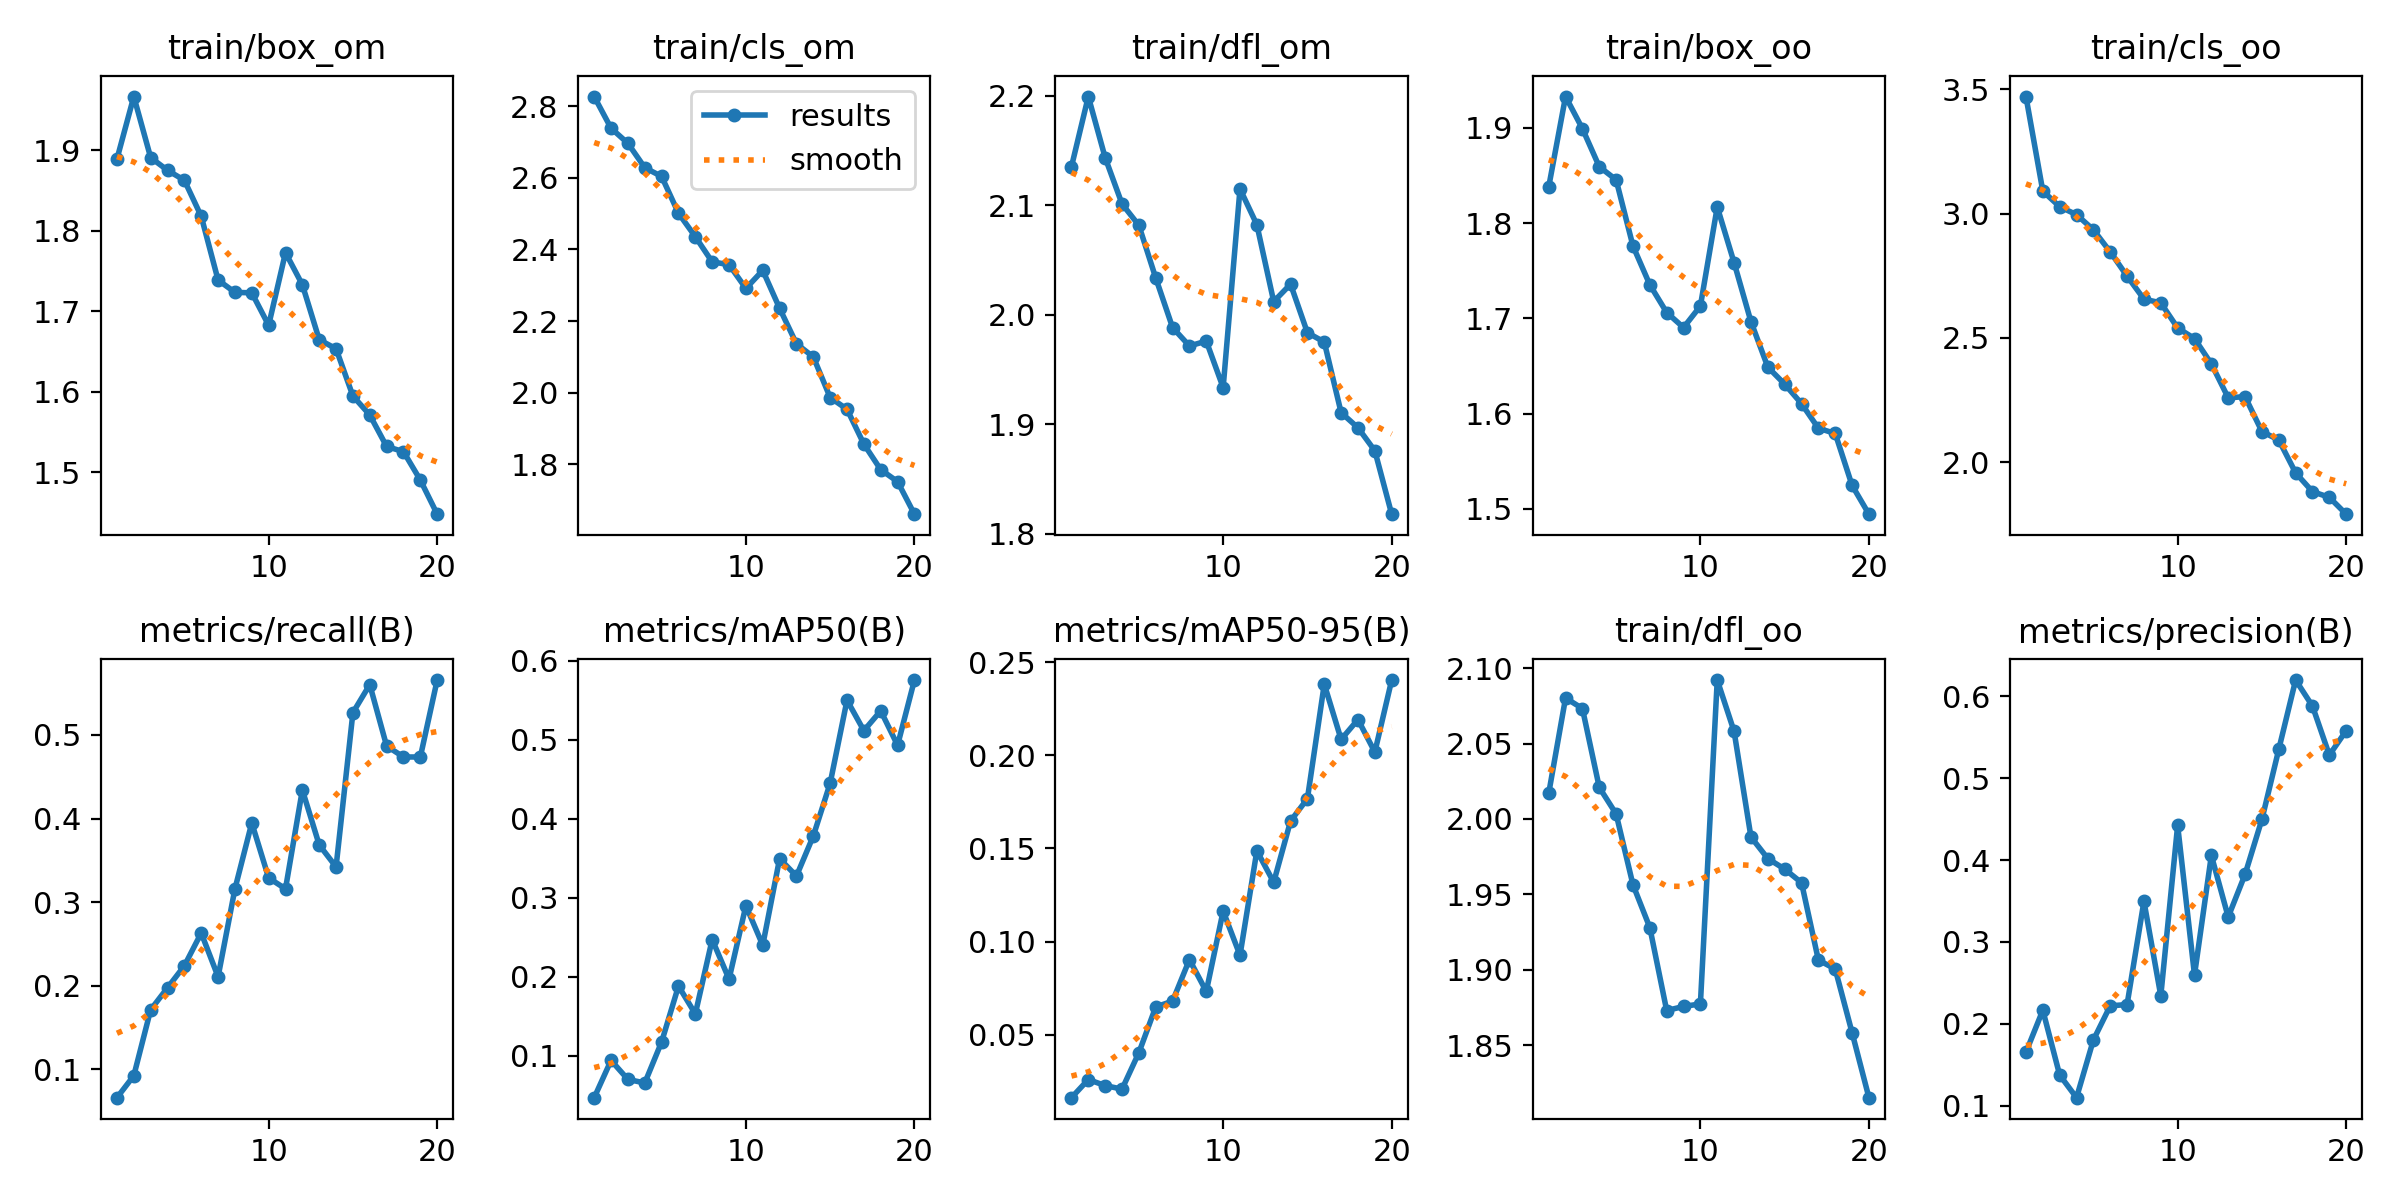

In [ ]:
Image(filename='/content/ft_models/yolo_v10/results.png', width=600)


0: 640x640 1 cancer, 1701.8ms
Speed: 22.8ms preprocess, 1701.8ms inference, 27.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 68, Height 85, Area 5780


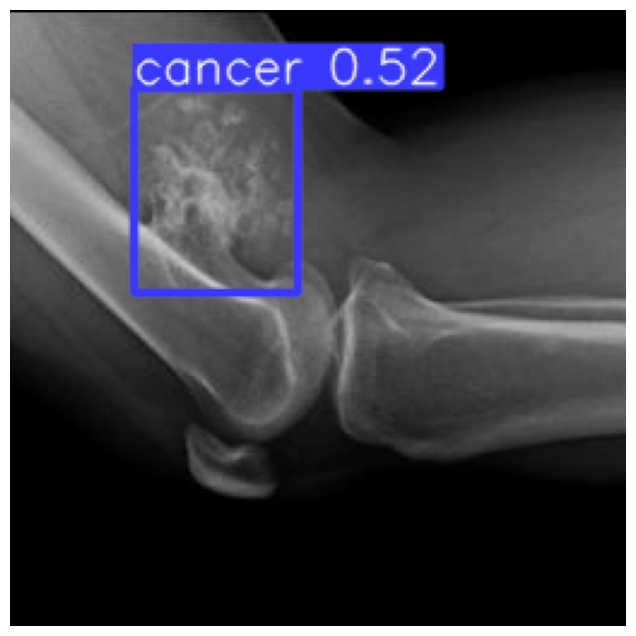


0: 640x640 1 cancer, 1384.4ms
Speed: 4.9ms preprocess, 1384.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 89, Height 68, Area 6052


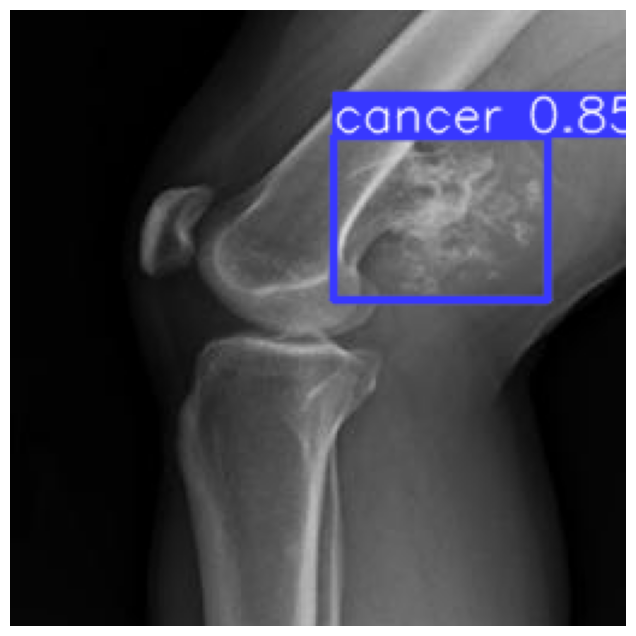


0: 640x640 1 cancer, 1651.6ms
Speed: 4.3ms preprocess, 1651.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 65, Height 79, Area 5135


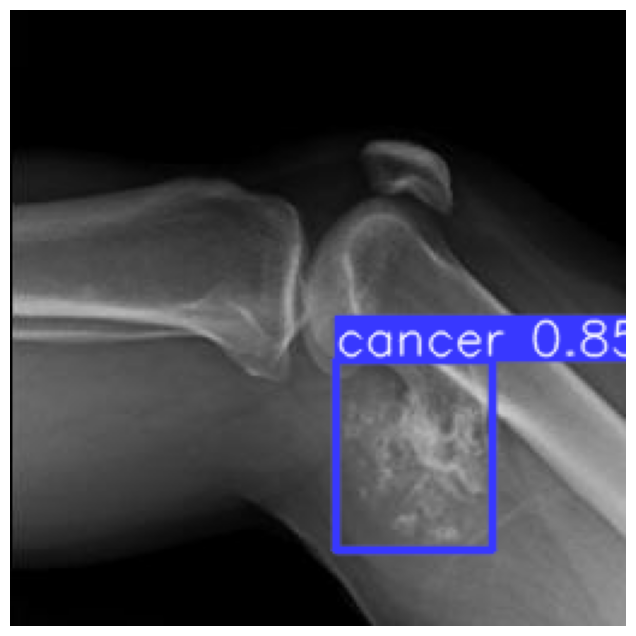


0: 640x640 1 cancer, 2988.1ms
Speed: 14.2ms preprocess, 2988.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 72, Height 84, Area 6048


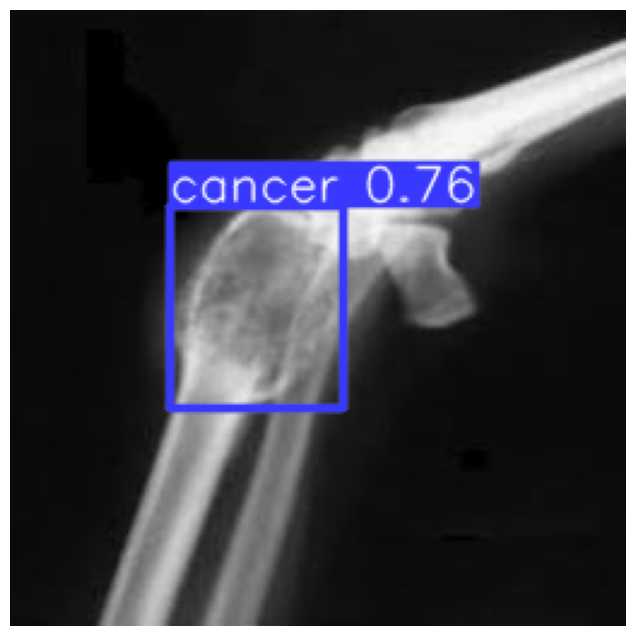


0: 640x640 1 cancer, 3023.7ms
Speed: 8.8ms preprocess, 3023.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 88, Height 73, Area 6424


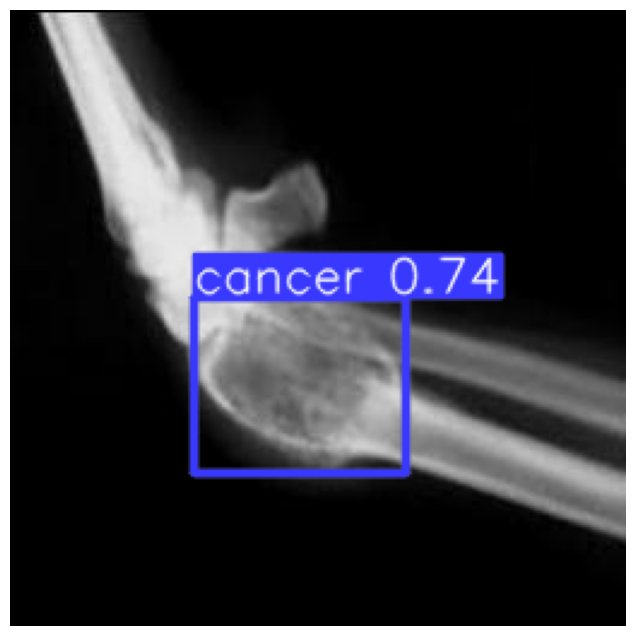


0: 640x640 2 cancers, 1476.5ms
Speed: 8.0ms preprocess, 1476.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 80, Height 97, Area 7760
Bounding Box Width 70, Height 92, Area 6440


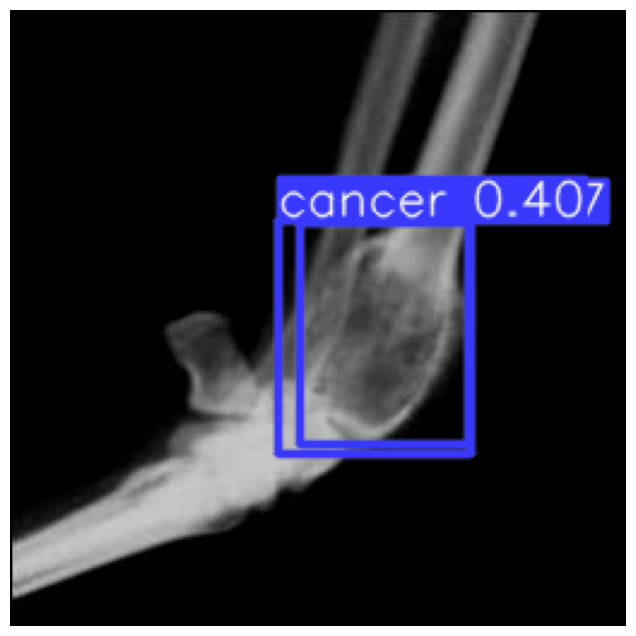


0: 640x640 2 cancers, 1372.6ms
Speed: 5.0ms preprocess, 1372.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 179, Height 144, Area 25776
Bounding Box Width 182, Height 179, Area 32578


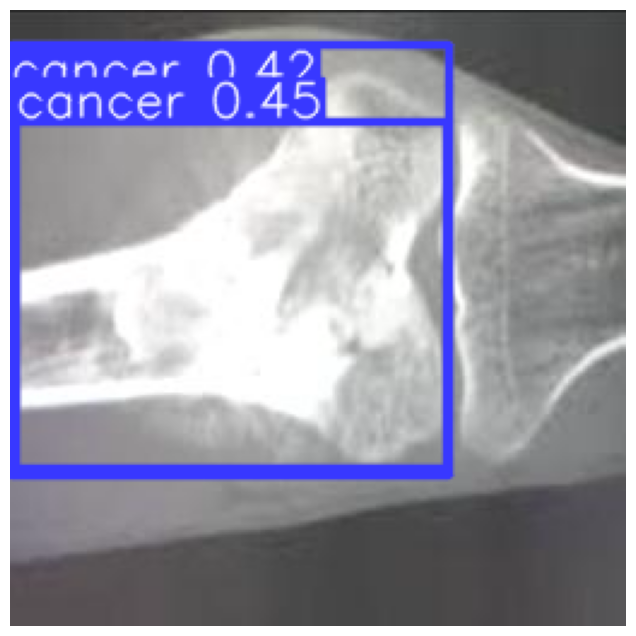


0: 640x640 1 cancer, 1381.1ms
Speed: 4.4ms preprocess, 1381.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 164, Height 181, Area 29684


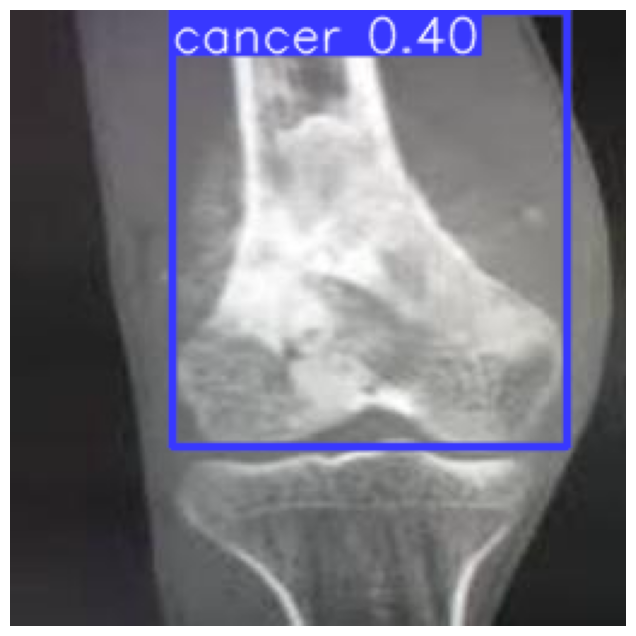


0: 640x640 1 cancer, 1393.1ms
Speed: 4.4ms preprocess, 1393.1ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 164, Height 181, Area 29684


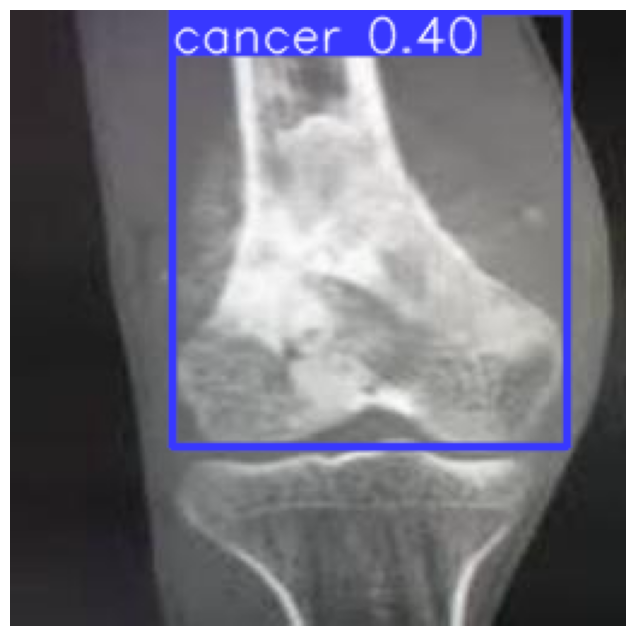


0: 640x640 (no detections), 1425.0ms
Speed: 8.2ms preprocess, 1425.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


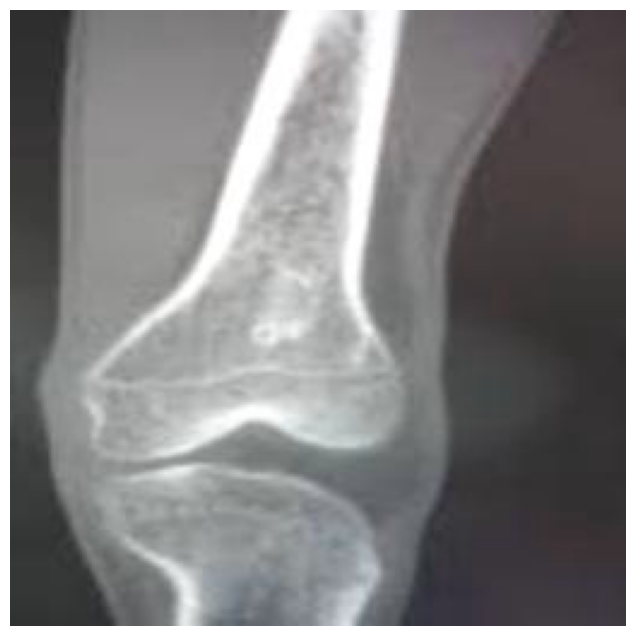


0: 640x640 (no detections), 1368.0ms
Speed: 4.5ms preprocess, 1368.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


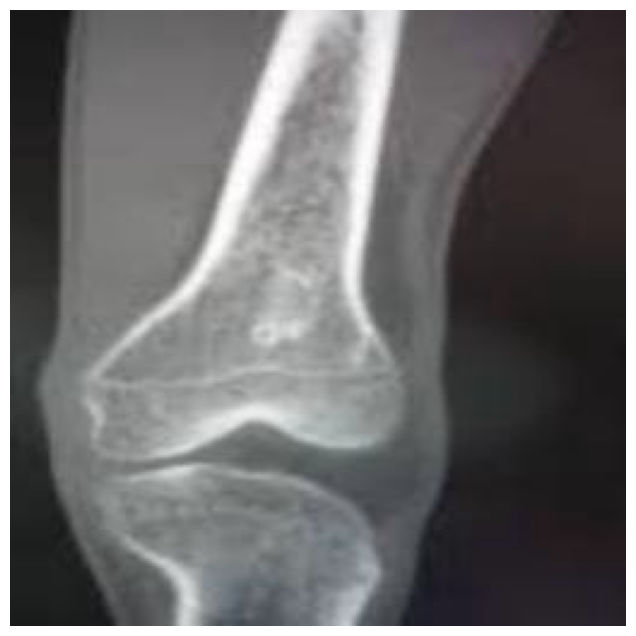


0: 640x640 (no detections), 2145.0ms
Speed: 5.9ms preprocess, 2145.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


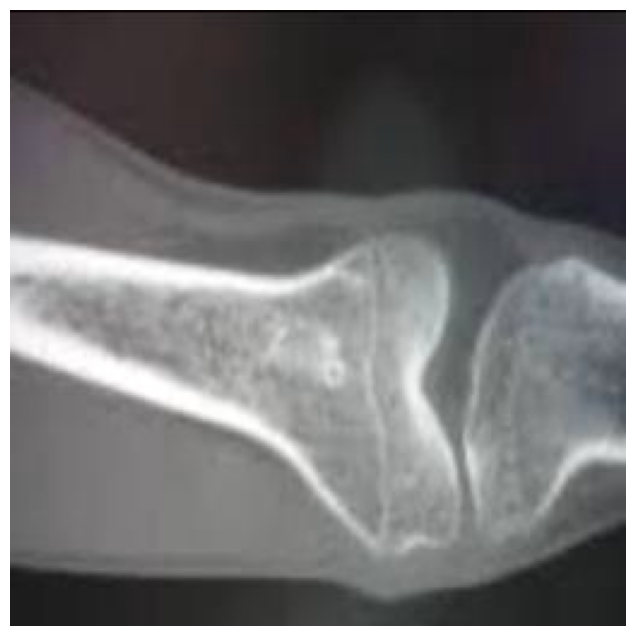


0: 640x640 2 cancers, 2202.5ms
Speed: 8.5ms preprocess, 2202.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 61, Height 67, Area 4087
Bounding Box Width 61, Height 68, Area 4148


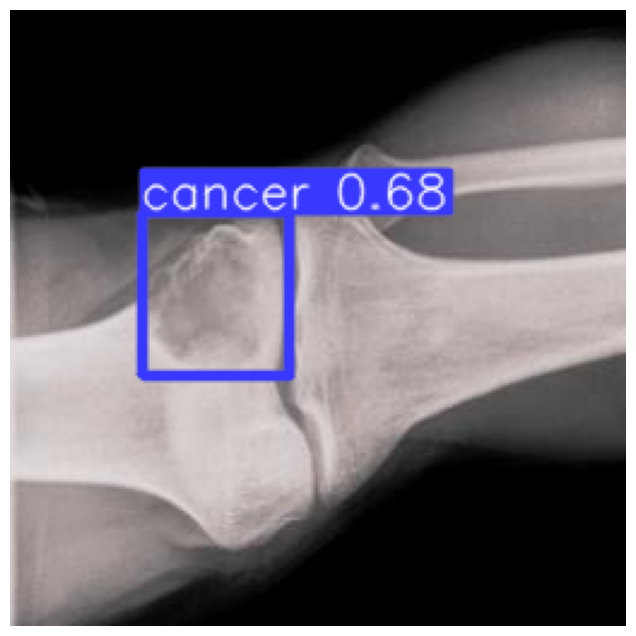


0: 640x640 2 cancers, 1480.6ms
Speed: 4.6ms preprocess, 1480.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 61, Height 67, Area 4087
Bounding Box Width 61, Height 69, Area 4209


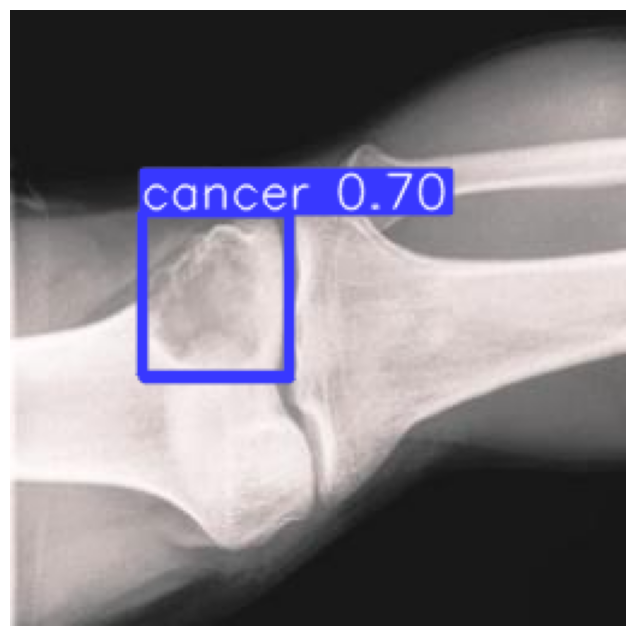


0: 640x640 1 cancer, 1402.1ms
Speed: 5.3ms preprocess, 1402.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 64, Height 63, Area 4032


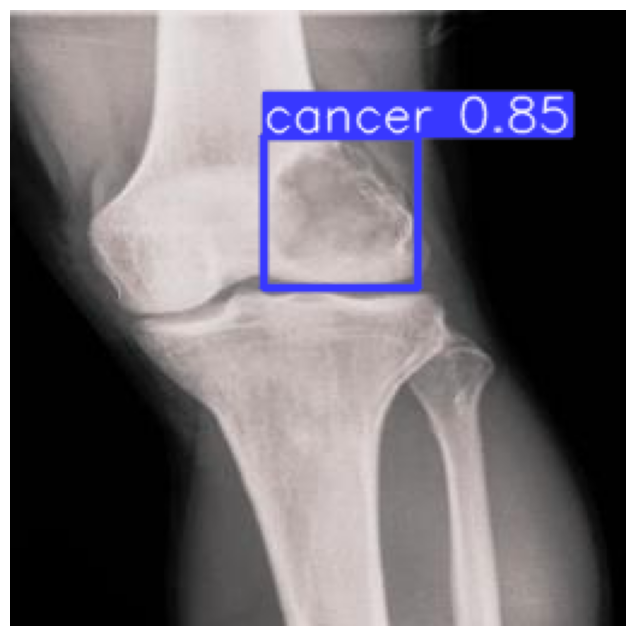


0: 640x640 1 cancer, 1403.2ms
Speed: 4.4ms preprocess, 1403.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 64, Height 62, Area 3968


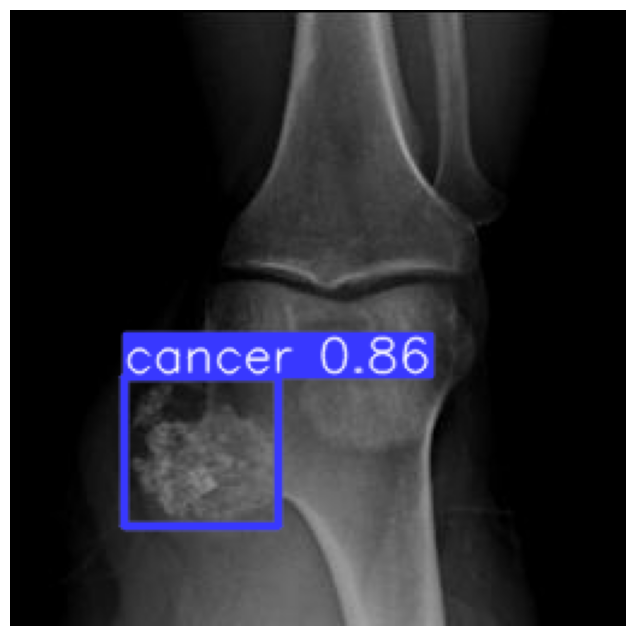


0: 640x640 1 cancer, 1440.5ms
Speed: 5.1ms preprocess, 1440.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 62, Height 65, Area 4030


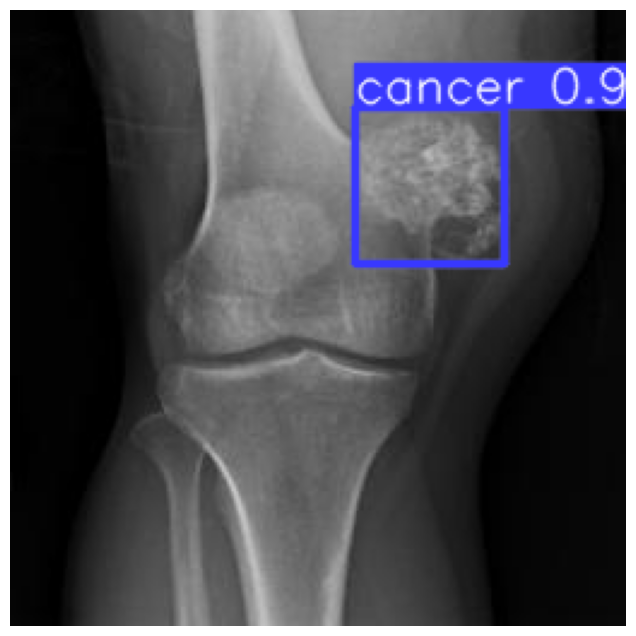


0: 640x640 1 cancer, 1386.4ms
Speed: 4.3ms preprocess, 1386.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 62, Height 64, Area 3968


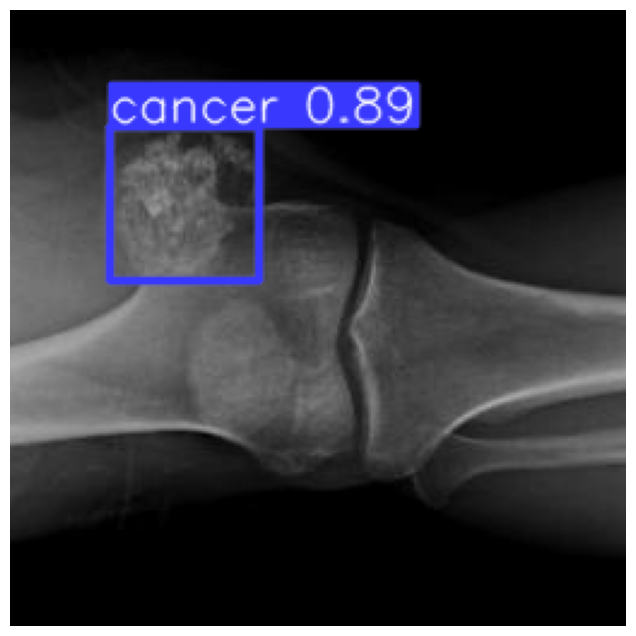


0: 640x640 1 cancer, 1422.7ms
Speed: 4.5ms preprocess, 1422.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 50, Height 44, Area 2200


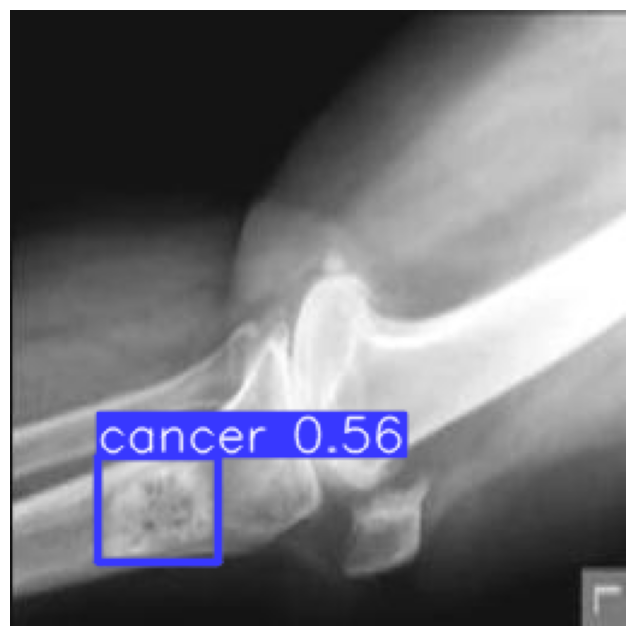


0: 640x640 2 cancers, 2215.3ms
Speed: 9.0ms preprocess, 2215.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Width 109, Height 123, Area 13407
Bounding Box Width 40, Height 49, Area 1960


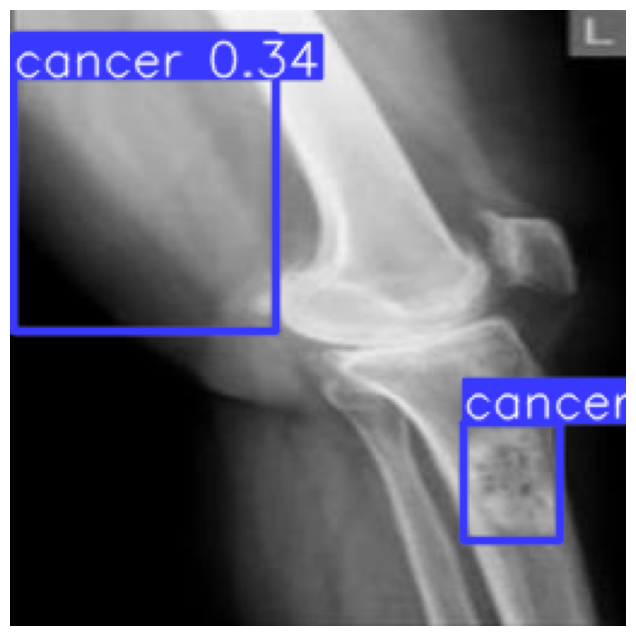

In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from ultralytics import YOLOv10
import cv2
from ultralytics.utils.plotting import Annotator

# Load the best trained model
best_v10_model = YOLOv10("/content/best.pt")

# Path to the images directory
image_dir = "/content/BONE-CANCER-SEGMENTATION-1/train/"

# List all images in the directory
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg'))])[:20]  # Get the first 10 images

# Iterate over the first 10 images
for i, image_file in enumerate(image_files, start=1):
    # Load the image
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    # Run inference
    results = best_v10_model.predict(image)
    annotator = Annotator(image, example=best_v10_model.names)

    # Access bounding box information directly from results.boxes
    for *xyxy, conf, cls in results[0].boxes.data:
        x1, y1, x2, y2 = map(int, xyxy) # Convert to integers
        width = x2 - x1
        height = y2 - y1
        area = width * height

        print("Bounding Box Width {}, Height {}, Area {}".format(width, height, area))

        # Use annotator to draw boxes on the image if needed
        annotator.box_label(xyxy, f'{best_v10_model.names[int(cls)]} {conf:.2f}')

    # Display the annotated image
    annotated_image = results[0].plot()

    # Show the image with Matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np

def compute_iou(box1, box2):
    """Compute Intersection over Union (IoU) for two bounding boxes."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = area_box1 + area_box2 - intersection
    return intersection / union if union > 0 else 0

def evaluate_model(model, test_images, ground_truths, iou_threshold=0.5):
    """
    Evaluate model predictions.

    Args:
        model: YOLO model instance.
        test_images: List of test image paths.
        ground_truths: List of ground truth annotations.
        iou_threshold: IoU threshold to consider a prediction correct.

    Returns:
        precision, recall, F1 score, mAP.
    """
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for img_path, gt_boxes in zip(test_images, ground_truths):
        # Load the image
        image = cv2.imread(img_path)

        # Predict using the model
        results = model.predict(image)
        pred_boxes = results[0].boxes.xyxy.numpy()  # Extract predicted bounding boxes
        pred_classes = results[0].boxes.cls.numpy()  # Predicted class labels

        matched = set()
        for pred_box, pred_class in zip(pred_boxes, pred_classes):
            for i, gt_box in enumerate(gt_boxes):
                iou = compute_iou(pred_box, gt_box)
                if iou >= iou_threshold and i not in matched:
                    true_positive += 1
                    matched.add(i)
                    break
            else:
                false_positive += 1

        false_negative += len(gt_boxes) - len(matched)

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score

# Example usage
test_images = ["/path/to/test/image1.jpg", "/path/to/test/image2.jpg"]  # Add your test image paths
ground_truths = [
    [[50, 50, 100, 100]],  # Add ground truth boxes for each image
    [[30, 30, 70, 70]],
]

precision, recall, f1 = evaluate_model(best_v10_model, test_images, ground_truths)
print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


NameError: name 'best_v10_model' is not defined